In [1]:
#Lets import the required dataset
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [2]:
df.shape

(30, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

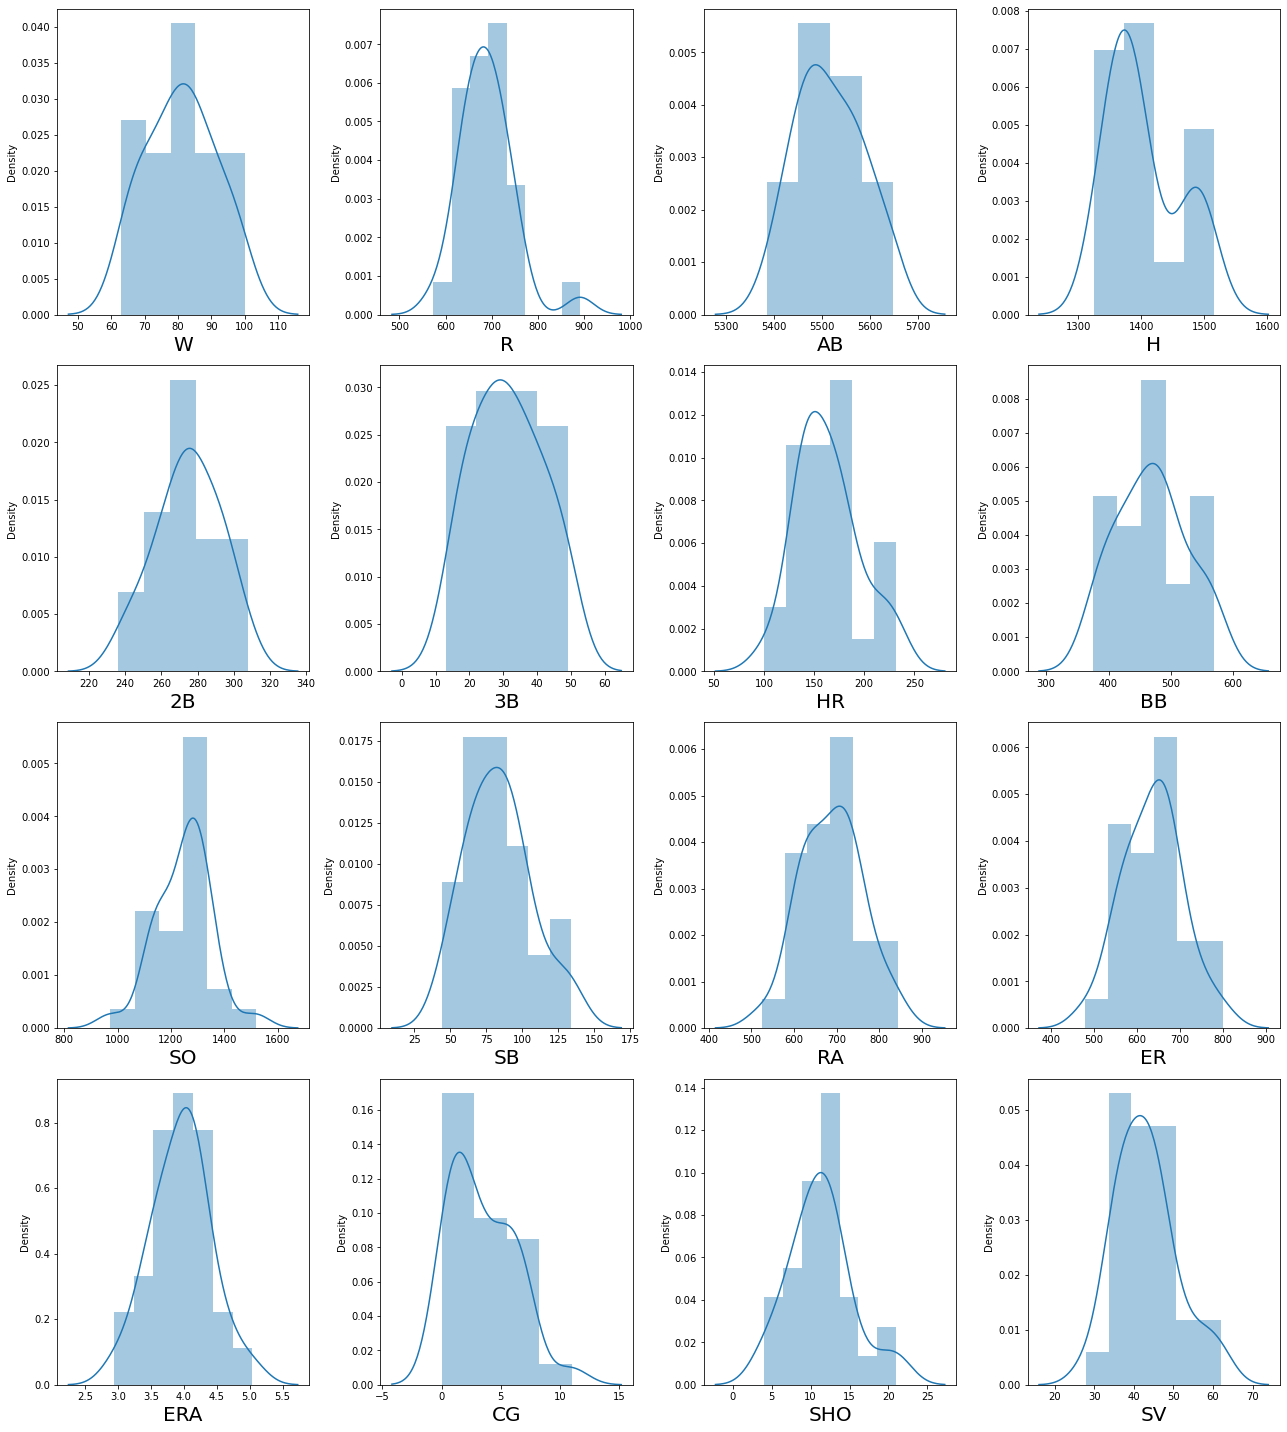

In [7]:
plt.figure(figsize = (18,20))

plotnumber = 1

for column in df:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

all graphs show normally distributed data

In [8]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


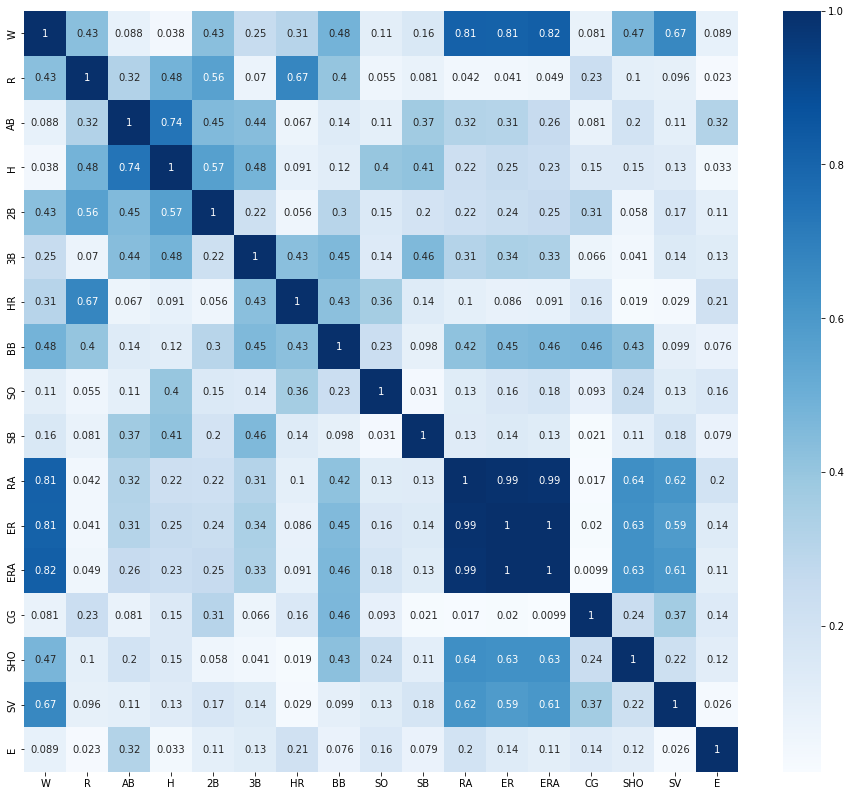

In [9]:
df_cor=df.corr().abs()  
plt.figure(figsize=(16,14))
sns.heatmap(df_cor,annot=True,cmap="Blues")
plt.show()

i think there is multycollinearity

<function matplotlib.pyplot.show(close=None, block=None)>

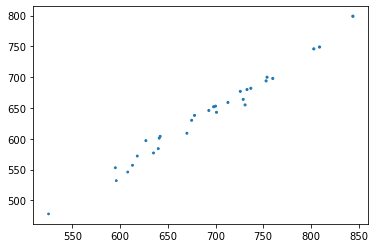

In [10]:
#conforming multicoleniarity
plt.scatter(df.RA,df.ER,df.ERA)
plt.show

Three coumns show same pattern so i am deleting 2 columns

In [11]:
df=df.drop(columns=['ER','ERA'])

In [12]:
df.shape

(30, 15)

In [13]:
y=df['W']
x=df.drop(columns=['W'])

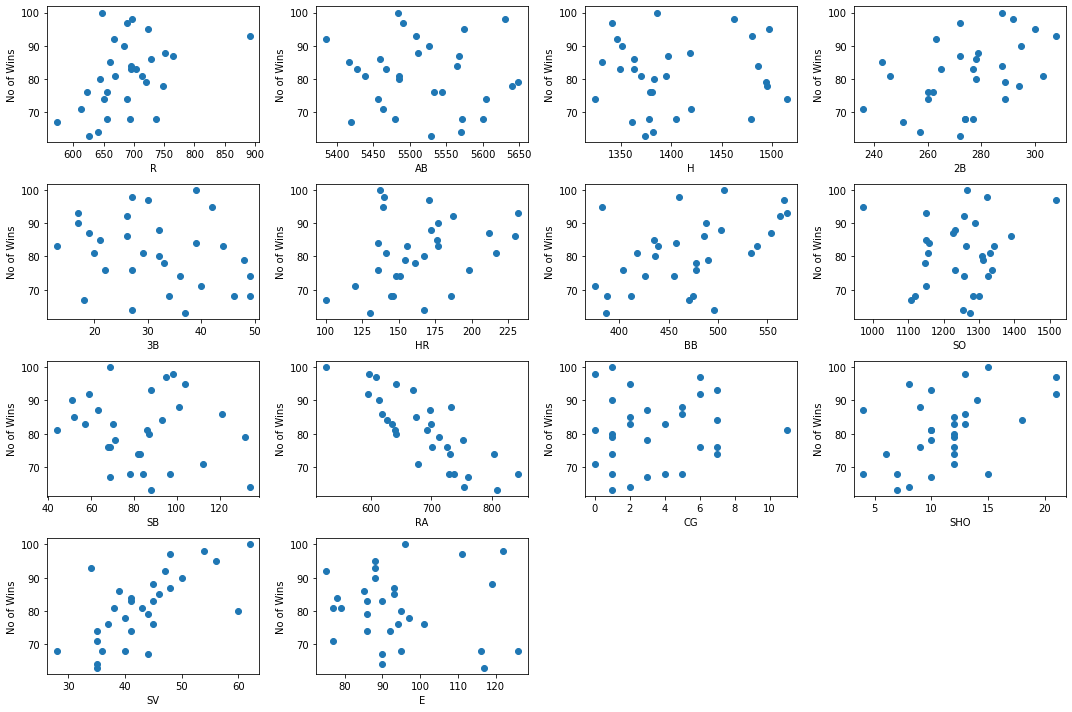

In [14]:
plt.figure(figsize = (15,10))
plotnumber = 1
for column in x:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('No of Wins',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

seems like all features are contributing

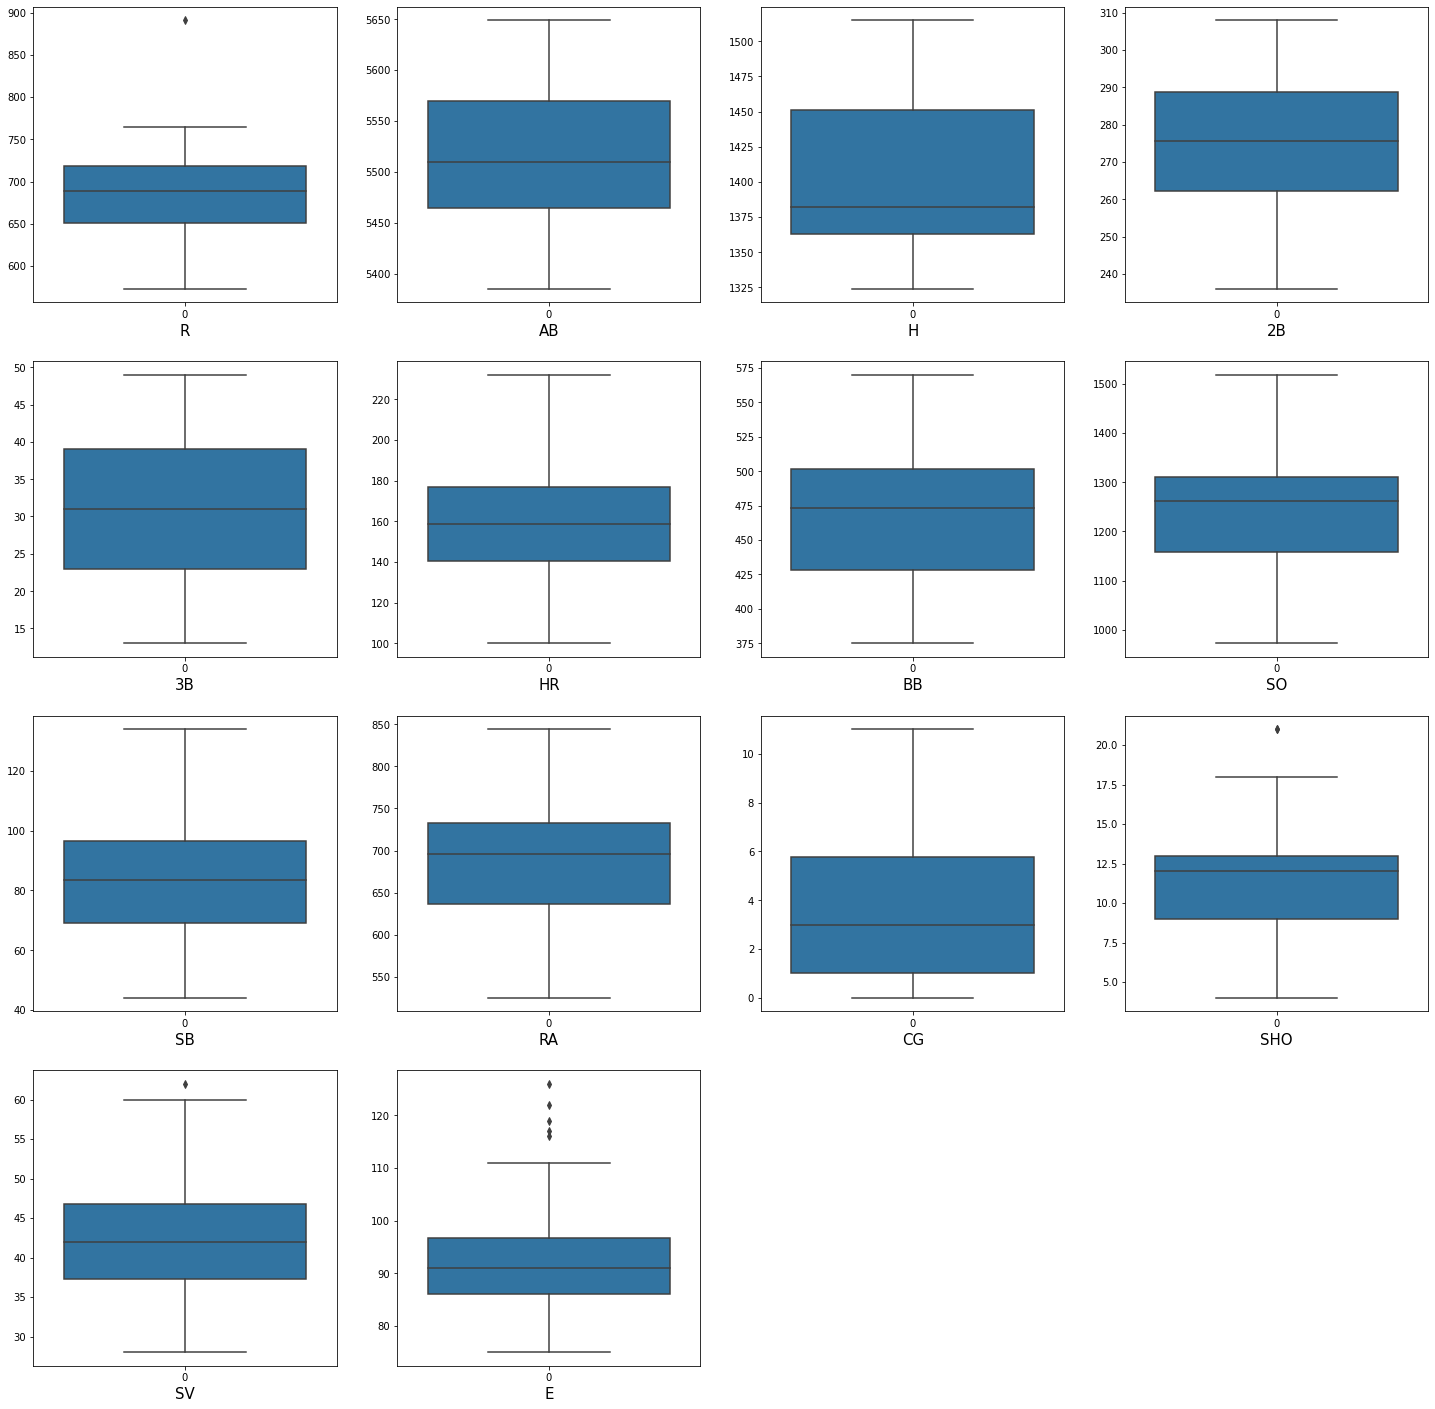

In [15]:
plt.figure(figsize = (25,25))
graph = 1
for column in x:
    if graph <=16:
        plt.subplot(4,4,graph)
        ax = sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

i can see some outliers and i cannot loose the data i will go with transformation of data...E,SV,SHO,R have outliers

In [16]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [17]:
e_h=(q3.E+(1.5*iqr.E))
print(e_h)
index=np.where(df['E']>e_h)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index().head()

112.875
(array([10, 14, 16, 18, 24], dtype=int64),)
(25, 15)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


In [18]:
r_h=(q3.R+(1.5*iqr.R))
print(r_h)
index=np.where(df['R']>r_h)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index().head()

818.75
(array([5], dtype=int64),)
(24, 15)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


In [19]:
sv_h=(q3.SV+(1.5*iqr.SV))
print(sv_h)
index=np.where(df['SV']>sv_h)
print(index)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index().head()

61.0
(array([12], dtype=int64),)
(23, 15)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


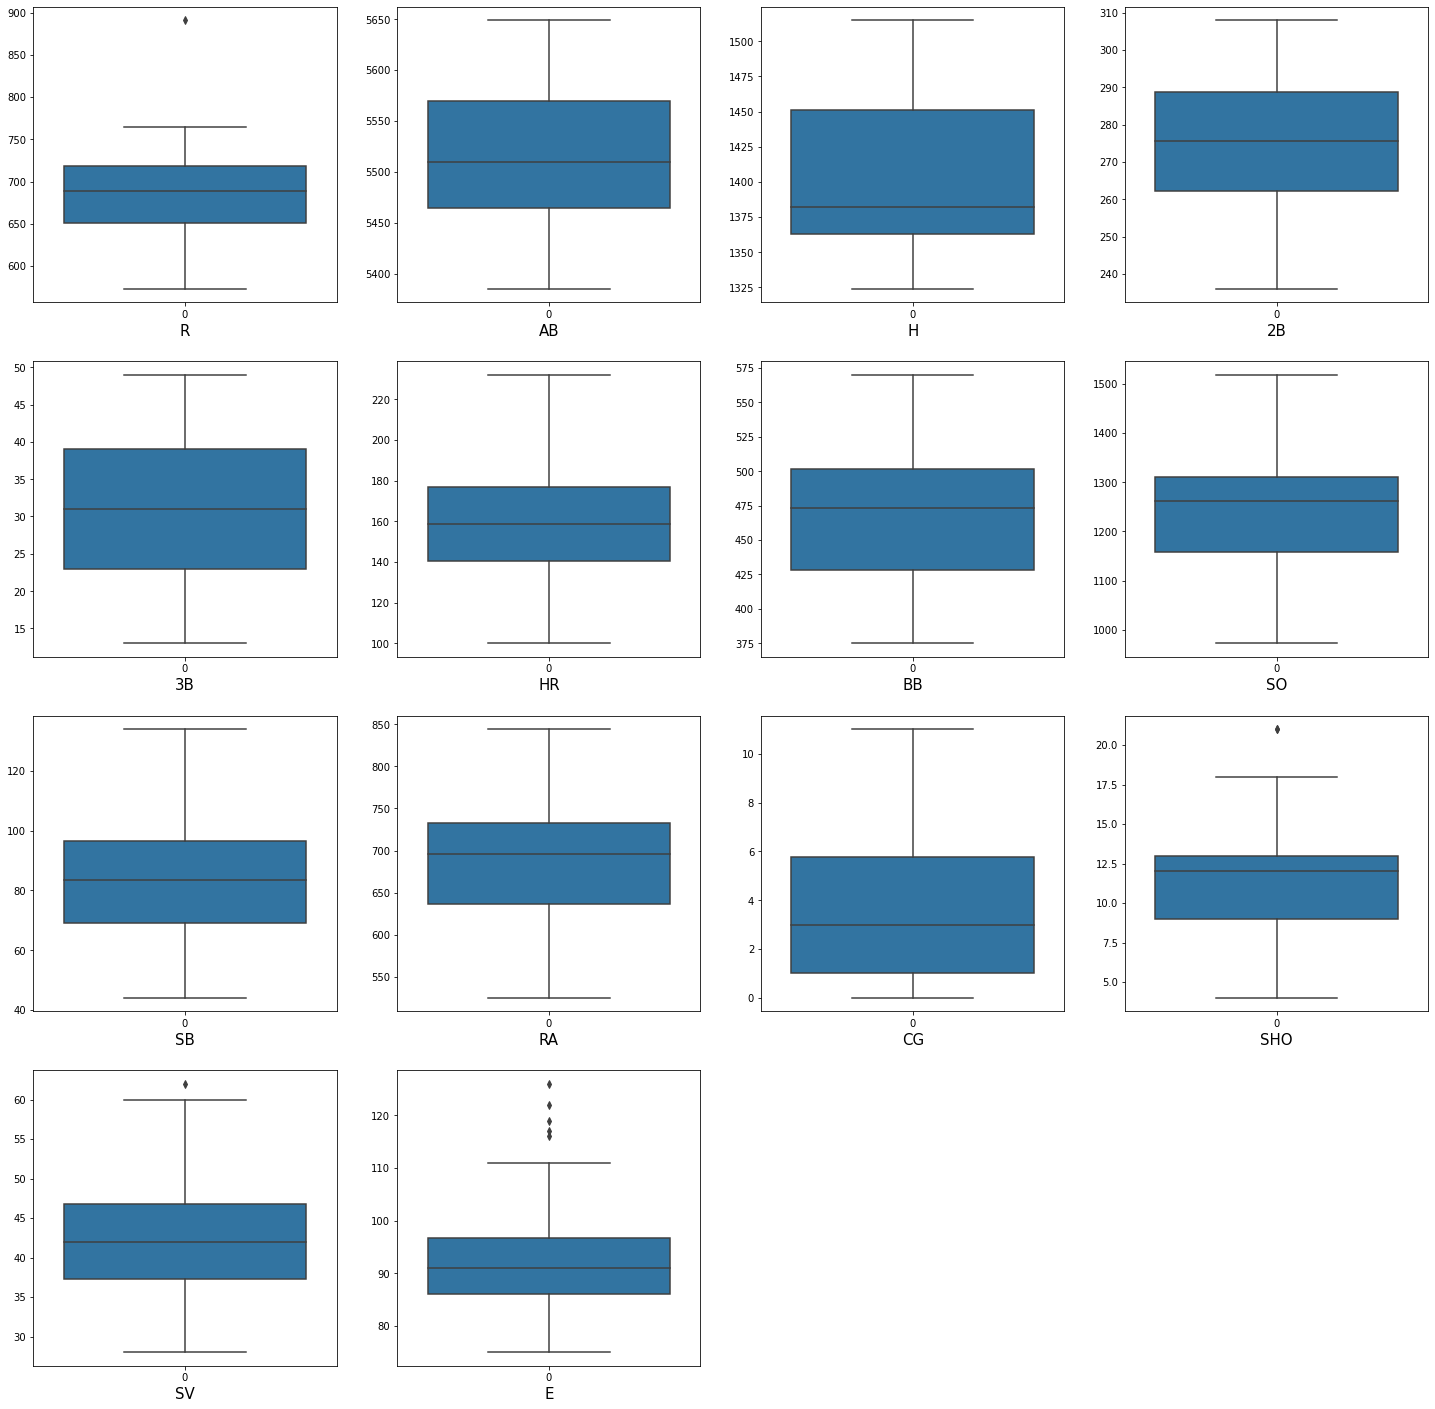

In [20]:
plt.figure(figsize = (25,25))
graph = 1
for column in x:
    if graph <=16:
        plt.subplot(4,4,graph)
        ax = sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scalar = scalar.fit_transform(x)
x_scalar

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.5398062 , -0.81462859,  1.67160651, -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
        -0.5398062 ,  0.1728    ,  0.24987932, -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
         2.77264091, -0.32091429, -0.65485616, -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         1.3004422 , -0.56777144, -0.78410408,  0.48575751],
       [ 0.01327008,  1.28073815,  1.98408098,  0.80189192,  1.72234737,
        -0.40377019, -0.25136033,  0.10586628, -0.02228984,  1.61880269,
         1.3004422 ,  0.17

In [22]:
x_scalar.shape[1]

14

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scalar,i)
            for i in range(x_scalar.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,10.791320,R
1,4.369242,AB
2,8.568511,H
3,3.667399,2B
4,2.998994,3B
5,7.586684,HR
6,3.541589,BB
7,2.181428,SO
8,1.844092,SB
9,5.068366,RA


remove the columns where vif is more 

In [25]:
nx=x.drop(columns=['R'])
nx.head()

,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


In [26]:
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
x_train,x_test,y_train,y_test = train_test_split(nx,y,test_size = 0.25,random_state =2)

In [28]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred=lr.predict(x_test)
y_pred

array([76, 84, 85, 85, 92, 76, 76, 81], dtype=int64)

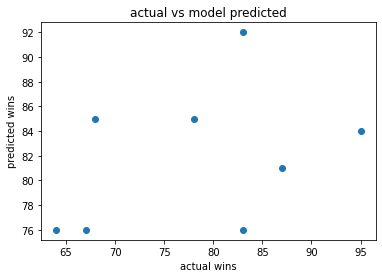

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual wins')
plt.ylabel('predicted wins')
plt.title('actual vs model predicted')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import mean_absolute_error as mae

In [32]:
mae(y_test,y_pred)

9.75

In [33]:
mse(y_test,y_pred)

106.25

In [35]:
np.sqrt(mse(y_test,y_pred))

10.307764064044152

In [37]:
lr.score(x_train,y_train)

1.0

In [38]:
lr.score(x_test,y_test)

0.0

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_predict = reg.predict(x_test)
y_predict

array([76.97144058, 82.20334656, 96.83273827, 83.86492508, 87.5533905 ,
       74.50559235, 62.36931708, 97.25837191])

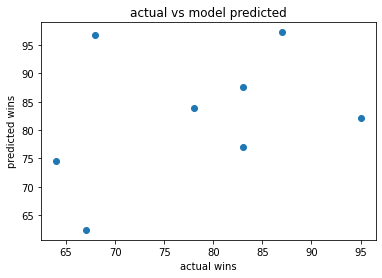

In [42]:
plt.scatter(y_test,y_predict)
plt.xlabel('actual wins')
plt.ylabel('predicted wins')
plt.title('actual vs model predicted')
plt.show()

In [43]:
mae(y_test,y_predict)

10.433864235900515

In [44]:
mse(y_test,y_predict)

165.45003305460898

In [45]:
np.sqrt(mse(y_test,y_predict))

12.86273816318318

In [46]:
lr.score(x_train,y_train)

1.0

In [47]:
lr.score(x_test,y_test)

0.0

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [54]:
rfr=RandomForestRegressor()
pipeline=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor())])
parameters = {"rfr__n_estimators":[10,100,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'rfr__n_estimators': 10}

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [61]:
pipeline_rfr=Pipeline([("ss",StandardScaler()),("rfr",RandomForestRegressor(n_estimators=10))])
maxr2_score(pipeline_rfr,x,y)

r2 score corresponding to  42  is  0.5741861937935402
r2 score corresponding to  43  is  0.483839009287925
r2 score corresponding to  44  is  0.7938436744560838
r2 score corresponding to  45  is  0.47644796380090493
r2 score corresponding to  46  is  0.25373656983684845
r2 score corresponding to  47  is  0.47608009708737864
r2 score corresponding to  48  is  0.7399654377880187
r2 score corresponding to  49  is  0.43976326416933587
r2 score corresponding to  50  is  0.6060603040119612
r2 score corresponding to  51  is  -0.28580779220779196
r2 score corresponding to  52  is  -0.24082781456953684
r2 score corresponding to  53  is  0.06788091068301205
r2 score corresponding to  54  is  0.6753552158273382
r2 score corresponding to  55  is  0.4274099965047188
r2 score corresponding to  56  is  0.2896528117359408
r2 score corresponding to  57  is  0.23344188658057363
r2 score corresponding to  58  is  -0.23330474934036927
r2 score corresponding to  59  is  0.4148605795516682
r2 score correspo

73

In [63]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [64]:
print("RANDOM FOREST\n\n")
model_evaluation(pipeline_rfr,x,y)

RANDOM FOREST


Mean r2 score for regressor:  -0.8184470138799318
standard deviation in r2 score for regressor:  2.190901455547704
[ 0.11095027 -5.16477099  0.08910129  0.06624176  0.8062426 ]


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       0.0
          83       0.00      0.00      0.00       2.0
          84       0.00      0.00      0.00       0.0
          85       0.00      0.00      0.00       0.0
          87       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       0.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

accuracy=accuracy_score(y_test,y_pred)
accuracy

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

con_mat=confusion_matrix(y_test,y_pred)
con_mat

fpr,tpr,thresholds=roc_curve(y_test,y_pred)

auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)